# Setup of a web-based Qiskit environment and running quantum circuits on simulators and real quantum computers

## Outline

1. Graphical IBM Circuit Composer
1. Setup Online Qiskit Environment
1. Execute Qiskit Circuit on Simulators
    * Visualise results (and create bell circuit)
    * visualise the circuit
    * connect to IBM Quantum Cloud services
    * use mock devices (noisy simulator)
1. Execute Qiskit Circuit on Real Quantum Computing Hardware

## Resources
1. IBM Circuit Composer: https://quantum.ibm.com/composer/
1. IBM Quantum Guides: https://docs.quantum.ibm.com/guides

## Step 1 Graphical IBM Circuit Composer

1. Create a free ID for https://quantum.ibm.com/
1. Open https://quantum.ibm.com/composer/
1. Explore the UI, including docs & tutorials
1. Create a Bell State
    * see https://quantum.ibm.com/composer/files/c01eda592dda0036d3460637a42e1f91d42bcd15f5a06fed584f7f28038e00ff
1. Understand the results & visualisation
1. Execute the circuit on real hardware
   * use "Setup and run" in upper right corner of the UI
1. Understand the results
1. Generate Qiskit Code
   * View -> Panels -> Code Editor

## Step 2 Setup Online Qiskit Environment

1. Create online lab environment: https://docs.quantum.ibm.com/guides/online-lab-environments#online-lab-environments
   * choose qbraid: https://docs.quantum.ibm.com/guides/online-lab-environments#qbraid-lab
1. in qbraid
   * Launch Lab
   * Add Qiskit 1.2.0 environment (and choose this kernel in each notebook)
   * Create Launcher, Create Notebook “Python 3 / Qiskit 1.2.0”
   * list the qiskit modules with “%pip list | grep qiskit“

## Step 3 Execute Qiskit Circuit on Simulators

1. visualise Results (for Bell circuit): https://docs.quantum.ibm.com/guides/visualize-results
    * do not execute “options when plotting a histogram”
1. visualise the Circuit https://docs.quantum.ibm.com/guides/visualize-circuits#alternative-renderers
1. modify for using the newer "SamplerV2" instead of the deprecated "Sampler"
1. Setup an IBM Quantum Channel (IQP) https://docs.quantum.ibm.com/guides/setup-channel#set-up-to-use-ibm-quantum-platform (execute step 3 only)
    * remember for your next notebooks to load your saved credentials with
    * service = QiskitRuntimeService()
1. use fake backends (noisy simulator) https://docs.quantum.ibm.com/guides/local-testing-mode#fake-backends-example
    * Note: when using SamplerV2, need to change the plot_histogram to:
    * plot_histogram(result[0].data.meas.get_counts())

In [8]:
# visualise Results (for Bell circuit)

from qiskit_aer.primitives import Sampler
 
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
 
sampler = Sampler(backend_options={"seed_simulator": 1234})

In [9]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()
 
# execute the quantum circuit
quasi_dists = sampler.run(bell, shots=1000).result().quasi_dists[0]
print(quasi_dists)

{3: 0.485, 0: 0.515}


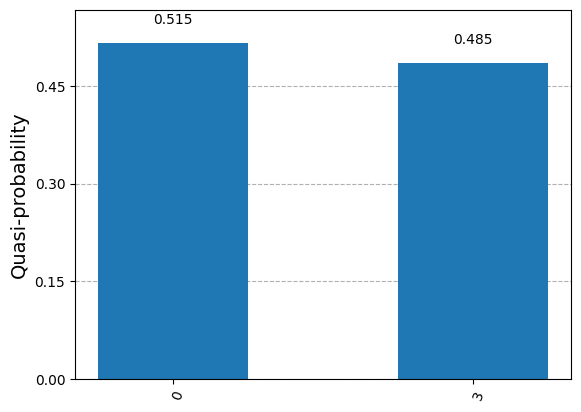

In [10]:
plot_histogram(quasi_dists)

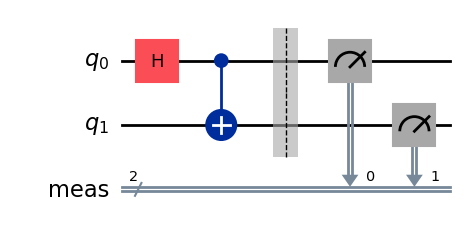

In [11]:
# visualise the circuit

bell.draw(output="mpl")

{'00': 527, '11': 497}


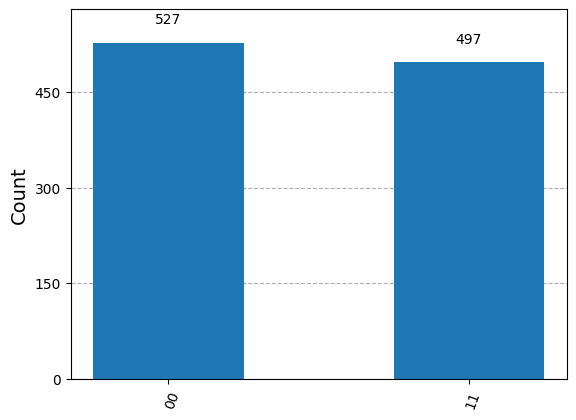

In [12]:
# modify for using the newer "SamplerV2" instead of the deprecated "Sampler"

from qiskit_aer.primitives import SamplerV2 as Sampler
 
sampler = Sampler()

counts = sampler.run([bell]).result()[0].data.meas.get_counts()
print(counts)

plot_histogram(counts)

In [13]:
# Setup an IBM Quantum Channel

# save credentials (only once)
token = "<YOUR_IBM_QUANTUM_TOKEN>"
from qiskit_ibm_runtime import QiskitRuntimeService
 
QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum" # `channel` distinguishes between different account types
)

In [14]:
# Load saved credentials

from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

In [15]:
# use fake backends (noisy simulator)

from qiskit.circuit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
 
# Bell Circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
 
# Run the sampler job locally using FakeManilaV2
fake_manila = FakeManilaV2()
pm = generate_preset_pass_manager(backend=fake_manila, optimization_level=1)
isa_qc = pm.run(qc)
 
# You can use a fixed seed to get fixed results.
options = {"simulator": {"seed_simulator": 42}}
sampler = Sampler(mode=fake_manila, options=options)
 
result = sampler.run([isa_qc]).result()

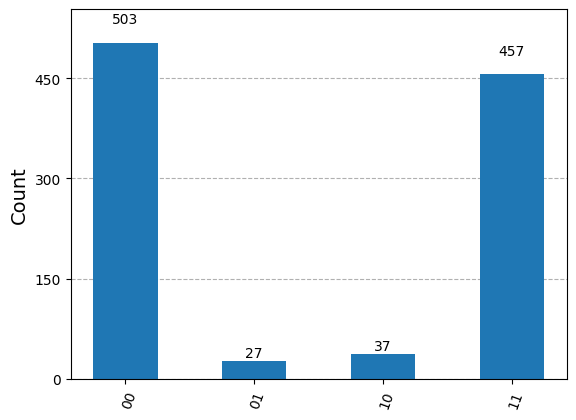

In [16]:
plot_histogram(result[0].data.meas.get_counts())

In [17]:
# option: print counts
print(result[0].data.meas.get_counts())

{'11': 457, '00': 503, '01': 27, '10': 37}


# Step 4 Execute Qiskit Circuit on Real Quantum Computing Hardware
1. See code in step 5 of https://docs.quantum.ibm.com/guides/setup-channel#set-up-to-use-ibm-quantum-platform and adjust slightly
2. See https://docs.quantum.ibm.com/guides/monitor-job how to monitor and retrieve jobs
    * see dashboard with your jobs: https://quantum.ibm.com
4. to avoid waiting for execution on real backend, results from previous jobs in QiskitRuntimeService can be retrieved with
   * job = service.job(PREVIOUS_JOB_ID)

In [19]:
# execute circuit on real hardware

# select least busy backend
backend = service.least_busy(operational=True, simulator=False)
sampler = Sampler(backend)

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

job = sampler.run([isa_qc])
print(f"job id: {job.job_id()}")

job.status()

job id: czk633wfcch0008b7rfg


'QUEUED'

In [23]:
job.status()

'DONE'

In [ ]:
# optional: retrieve previous job
job = service.job(PREVIOUS_JOB_ID)

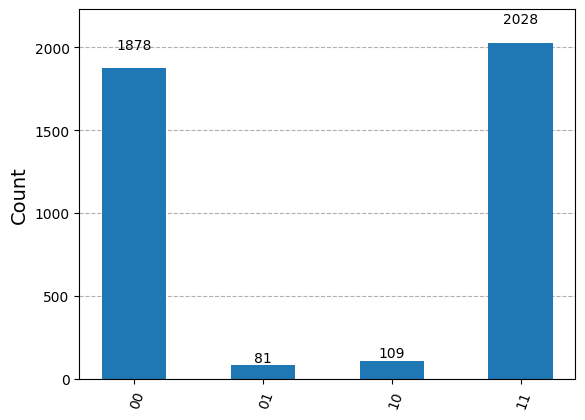

In [24]:
result = job.result()
plot_histogram(result[0].data.meas.get_counts())